In [ ]:

    plt.xlim([d['limx1'], d['limx2']])
    plt.ylim([d['limy1'], d['limy2']])

In [3]:
def inputChastProizv():
   
    params = input('Введите названия переменных: ')
    params = params.split(' ')
    if len(params) > 2:
        print('Введено более двух переменных')
    elif len(params) < 2:
        print('Введено менее двух переменных')
    F = input('Функция в аналитическом виде :  ')
    L = input('Есть ли ограничения, 1 - да; 0 нет : ')
    if L == '1':
        lim1 = input(f'Ограничения для {params[0]} через пробел :  ')
        lim2 = input(f'Ограничения для {params[1]} через пробел :  ')
    elif L =='0':
        lim1 = ('999')
        lim2 = ('999')
    else :
        return 'Ошибка ввода наличия ограничений'
    
   
    lim1 = list(map(float, (lim1.split(' '))))
    lim2 = list(map(float, (lim2.split(' '))))
    Final = {'p1': params[0],
             'p2': params[1],
             'func': F,
             'lims1': lim1,
             'lims2': lim2}
    return Final

from sympy import *
def chastproizv(dictionary):
    # преобразование данных для символьного вычислнения
    import numpy as np
    from sympy.parsing.sympy_parser import parse_expr
    
    data = dictionary
    func = data['func']
    func = parse_expr(func)
    p1 = data['p1']
    x = Symbol(p1)
    p2 = data['p2']
    y = Symbol(p2)
    lim1 = data['lims1']
    lim2 = data['lims2']
    # реализация метода
    
    dx = func.diff(p1)
    dy = func.diff(p2)
    points = solve((dx,dy), [x,y], dict = True)
    A = dx.diff(p1)
    B = dx.diff(p2)
    C = dy.diff(p2)
    for i in points:
        A = A.subs([(x, i[x]), (y, i[y])])
        B = B.subs([(x, i[x]), (y, i[y])])
        C = C.subs([(x, i[x]), (y, i[y])])
        if len(lim1) == len(lim2) == 2 :
            if (float(i[x]) >= lim1[0] and float(i[x]) <= lim1[1]) and (float(i[y]) >= lim2[0] and float(i[y]) <= lim2[1]):
                if A*C-B**2>0:
                    if A>0:
                        i['тип'] ='условный минимум'
                        i['Func'] = func.subs(x,i[x]).subs(y,i[y])
                        print(i)
                    elif A<0:
                        i['тип'] ='условный максимум'
                        i['Func'] = func.subs(x,i[x]).subs(y,i[y])
                        print(i)
                    ### else : ????
                    
                elif A*C-B**2<0:
                    i['тип'] = 'седловая точка'
                    i['Func'] = func.subs(x,i[x]).subs(y,i[y])
                    print(i)
                else:
                    i['тип'] = 'требуется дополнительное исследование'
                    i['Func'] = func.subs(x,i[x]).subs(y,i[y])
                    print(i)
        else :
            if A*C-B**2>0:
                    if A>0:
                        i['тип'] ='условный минимум'
                        i['Func'] = func.subs(x,i[x]).subs(y,i[y])
                        print(i)
                    elif A<0:
                        i['тип'] ='условный максимум'
                        i['Func'] = func.subs(x,i[x]).subs(y,i[y])
                        print(i)
                    ### else : ????
                    
            elif A*C-B**2<0:
                i['тип'] = 'седловая точка'
                i['Func'] = func.subs(x,i[x]).subs(y,i[y])
                print(i)
            else:
                i['тип'] = 'требуется дополнительное исследование'
                i['Func'] = func.subs(x,i[x]).subs(y,i[y])
                print(i)
                
    if len(lim1) == 2 :
        xx = np.linspace(lim1[0] - 5, lim1[1] + 5, 1000)
        yy = np.linspace(lim2[0] - 5, lim2[1] + 5, 1000)
    
    else:
        xx = np.linspace(-20, 20, 1000)
        yy = np.linspace(-20, 20, 1000)
        
        
    f = lambdify([x,y], func)
  

    coord_x_p = np.array([float(i[x]) for i in points if 'тип' in i]) 
    coord_y_p = np.array([float(i[y]) for i in points if 'тип' in i])
    coord_z_p = f(coord_x_p, coord_y_p)
    M = input('Масштабируем график, 1-да , 0- нет :')
    if M=='1':
        limx1=(float(sum(coord_x_p)/len(coord_x_p))+max(coord_x_p))
        limx2=(float(sum(coord_x_p)/len(coord_x_p))-max(coord_x_p))
        limy1=(float(sum(coord_y_p)/len(coord_y_p))+max(coord_y_p))
        limy2=(float(sum(coord_y_p)/len(coord_y_p))-max(coord_y_p))
        xx = np.linspace(limx2, limx1, 1000)
        yy = np.linspace(limy2, limx1 , 1000)
        
    elif M =='0':
        limx1 = ('999')
        limx2 = ('999')
        limy1 = ('999')
        limy2 = ('999')
        
    else :
        return 'Ошибка ввода наличия ограничений'
    
    X, Y = np.meshgrid(xx, yy)

    
    Z = f(X,Y)

    
  
    return {'x' : x, # переменная 1
            'y' : y, # переменная 2
            'func' : func, # функция с лямбдой
            'x_p' : coord_x_p, # координаты точек экстремумов по 1 пер (после ограничений)
            'y_p' : coord_y_p, # координаты точек экстремумов по 2 пер (после ограничений)
            'z_p' : coord_z_p, # значения функции в экстремумах,
            'X' : X,
            'Y' : Y,
            'Z' : Z,
           'limx1' : limx1,
           'limx2' : limx2,
           'limy1' : limy1,
           'limy2' : limy2 }

def graph(d):

    
    
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator
    from mpl_toolkits.mplot3d import Axes3D
    import matplotlib.pyplot as plt
    
    plt.rcParams['figure.figsize'] = (8,6)
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    
   
    

    surf = ax.plot_surface(d['X'], d['Y'], d['Z'], cmap='Purples',
                           alpha=0.5,linewidth=1, antialiased=False)
    
   
   
    
    ax.scatter3D(d['x_p'], d['y_p'], d['z_p'], c = 'red', s=50, alpha=1)
    
    
   
    
    ax.set_xlabel(f"{d['x']}")
    ax.set_ylabel(f"{d['y']}")
    ax.set_zlabel(f"{d['func']}")
    plt.show()

def graph_lines(d):
    import matplotlib.pyplot as plt
    
    plt.rcParams['figure.figsize'] = (6,6)
    fig, ax = plt.subplots()
    
    ax.contour(d['Z'])
    ax.clabel(ax.contour(d['Z']))
    
    ax.set_title(f'Линии уровня функции {d["func"]}')
    plt.show()

Введите названия переменных: x y
Функция в аналитическом виде :  y*(x**2) + x*(y**3) - x*y
Есть ли ограничения, 1 - да; 0 нет : 1
Ограничения для x через пробел :  -10 10
Ограничения для y через пробел :  -1 1
{x: 0, y: -1, 'тип': 'седловая точка', 'Func': 0}
{x: 0, y: 0, 'тип': 'седловая точка', 'Func': 0}
{x: 0, y: 1, 'тип': 'седловая точка', 'Func': 0}
{x: 2/5, y: -sqrt(5)/5, 'тип': 'седловая точка', 'Func': 4*sqrt(5)/125}
{x: 2/5, y: sqrt(5)/5, 'тип': 'седловая точка', 'Func': -4*sqrt(5)/125}
{x: 1, y: 0, 'тип': 'седловая точка', 'Func': 0}
Масштабируем график, 1-да , 0- нет :1


<IPython.core.display.Javascript object>


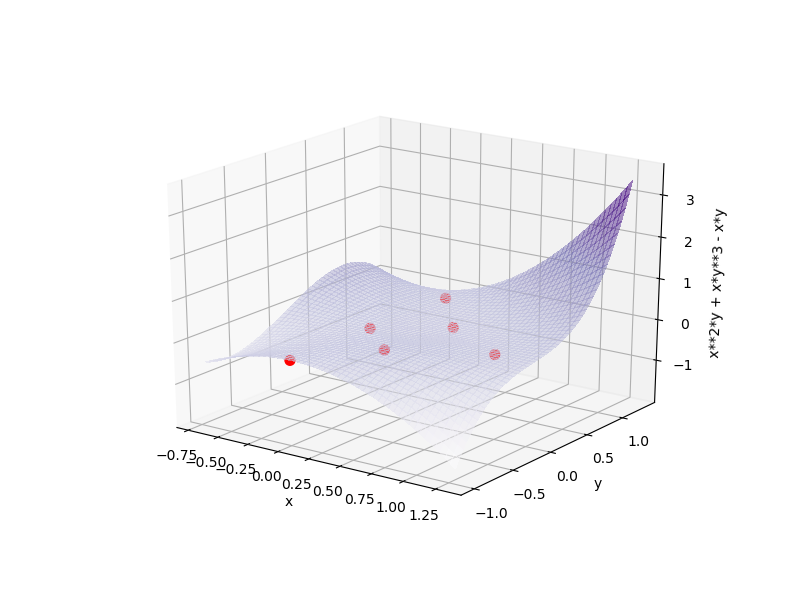

In [4]:
%matplotlib notebook
graph(chastproizv(inputChastProizv()))